SmartQueue: Machine Learning for Patient Risk Prediction

Step 1: Import Libraries

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib
import warnings
warnings.filterwarnings("ignore")


Step 2: Load and Clean the Dataset

In [24]:
df = pd.read_csv("CARDIA.csv")
df.columns = [col.strip().lower() for col in df.columns]
df.dropna(thresh=int(0.7 * df.shape[1]), inplace=True)
df.fillna(method='ffill', inplace=True)
for label in ['disease', 'disease_r', 'target']:
    if label in df.columns:
        df = df.drop(columns=label)
print(" Clean feature columns:", df.columns.tolist())
df = pd.read_csv("CARDIA.csv")
df.head()


 Clean feature columns: ['age', 'sex', 'chest pain', 'shortest of breath', 'heaviness or tightness', 'radiation into arms nack and jaw', 'congestion or burning', 'abnormal breathing', 'losing flat cause', 'decrease of sterngth', 'trobale with balance', 'heart rate normal and faster', 'trouble with sawllowing', 'low blood presure', 'missing in heartbeat rythom/abnormal rythom', 'need pellow or prefer to sleep in chair', 'syncopal attack', 'debilitation', 'fever', 'clubbing', 'rash', 'smocking', 'hypertension', 'hyperchoies terolamia', 'myocandial']


,Age,Sex,Chest Pain,Shortest of breath,Heaviness or tightness,Radiation into arms nack and jaw,Congestion or burning,Abnormal breathing,Losing flat cause,Decrease of sterngth,...,Fever,Clubbing,Rash,Smocking,Hypertension,Hyperchoies terolamia,Myocandial,Disease,target,Disease_r
0,31,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,20,1,PEPTICULCER
1,24,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,DYSPNOEA
2,50,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,21,1,ANEMIA
3,36,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,22,1,PHEUMONIA
4,40,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,23,1,PNECIMOTHORAX


Step 3: Encode Features

In [25]:
# 3. Preprocess Data
df.dropna(thresh=int(0.7 * df.shape[1]), inplace=True)
df.fillna(method='ffill', inplace=True)
df.columns = [col.strip().lower() for col in df.columns]

# Choose target column
target = 'disease_r' if 'disease_r' in df.columns else 'disease'
features = [col for col in df.columns if col != target and col != 'disease']

# Label encode target and features
le = LabelEncoder()
df[target] = le.fit_transform(df[target])
X = df[features].apply(lambda x: le.fit_transform(x) if x.dtypes == 'object' else x)
y = df[target]


Step 4: Split Data and Train Models

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [27]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_preds = log_reg.predict(X_test)
print("Logistic Regression Results:\n", classification_report(y_test, log_preds))
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Results:\n", classification_report(y_test, rf_preds))

Logistic Regression Results:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.80      1.00      0.89         4
           2       0.25      1.00      0.40         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.60      1.00      0.75         3
          12       0.00      0.00      0.00         1
          13       0.80      1.00      0.89         4
          14       0.00      0.00      0.00         1
          16       0.50      1.00      0.67         2
          17       1.00      1.00      1.00         1
          18       0.50      0.29      0.36         7
          19       1.00      1.00      1.00         1
          20       0.80      1.00      0.89        

Step 6: Confusion Matrices

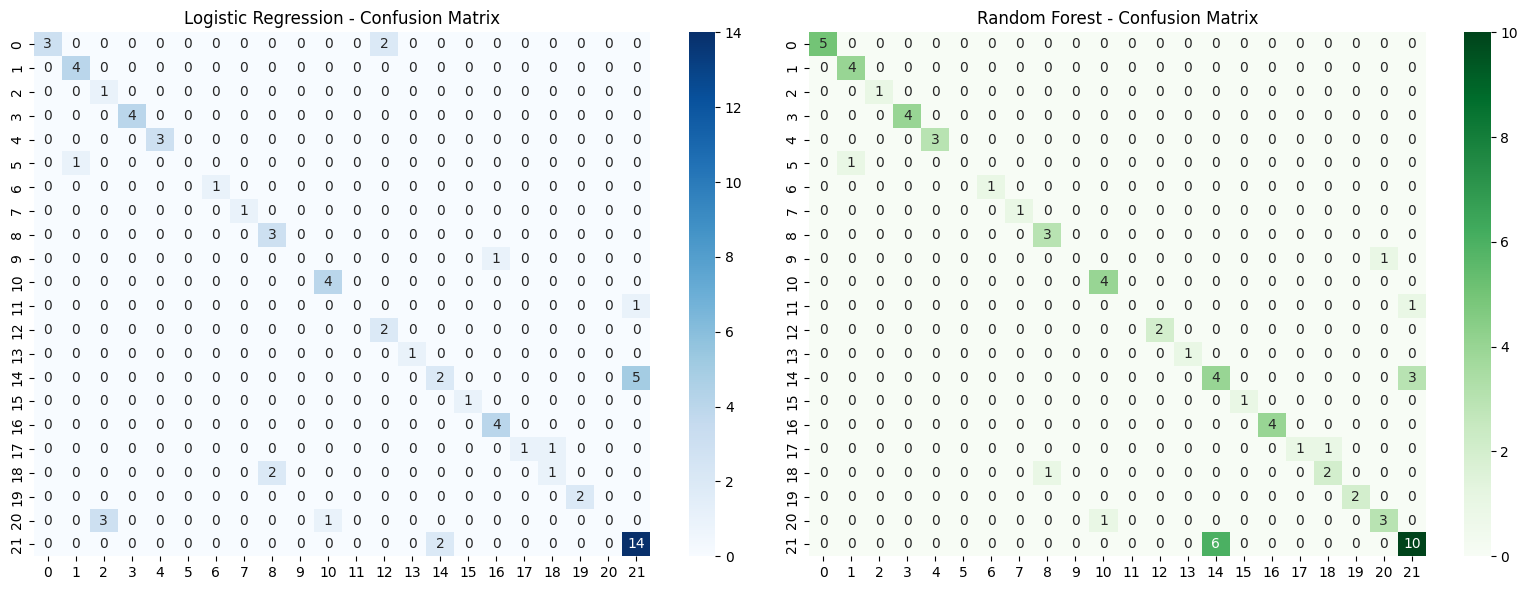

In [28]:
# Confusion Matrices
log_cm = confusion_matrix(y_test, log_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest - Confusion Matrix")

plt.tight_layout()
plt.show()


Step 7: Compare Model Accuracy

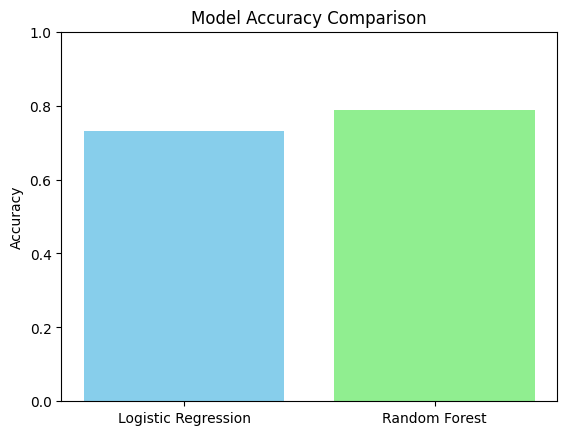

In [29]:
# Accuracy Comparison
log_acc = accuracy_score(y_test, log_preds)
rf_acc = accuracy_score(y_test, rf_preds)

models = ['Logistic Regression', 'Random Forest']
accuracies = [log_acc, rf_acc]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

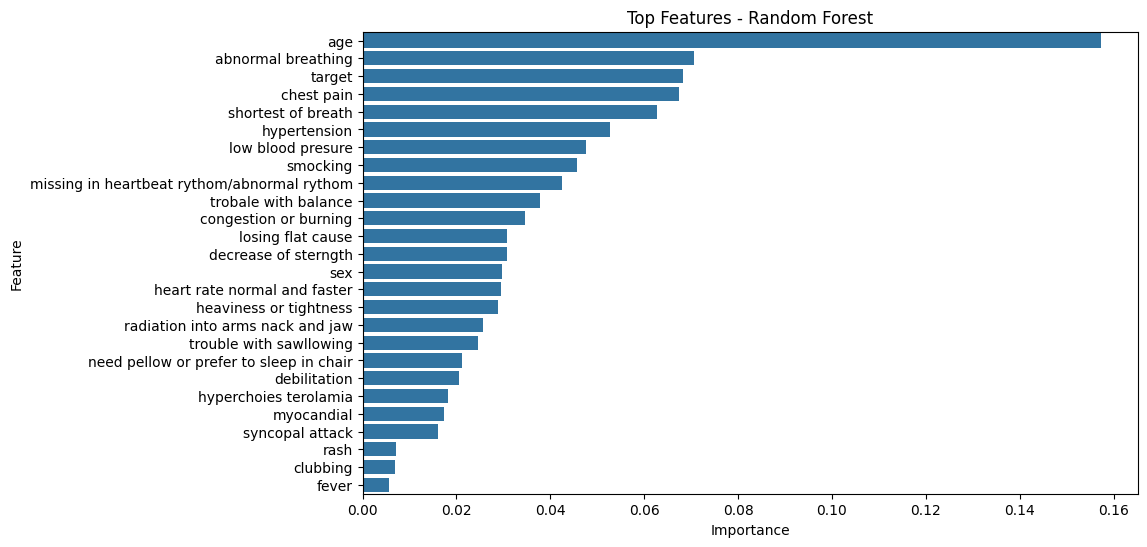

In [30]:
#  Feature Importance (Random Forest)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features_sorted)
plt.title("Top Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Step 8: Save the Final Model

In [31]:
# Save Model
joblib.dump(rf_model, "model_rf.pkl")

['model_rf.pkl']

In [32]:
print(X.columns.tolist())

['age', 'sex', 'chest pain', 'shortest of breath', 'heaviness or tightness', 'radiation into arms nack and jaw', 'congestion or burning', 'abnormal breathing', 'losing flat cause', 'decrease of sterngth', 'trobale with balance', 'heart rate normal and faster', 'trouble with sawllowing', 'low blood presure', 'missing in heartbeat rythom/abnormal rythom', 'need pellow or prefer to sleep in chair', 'syncopal attack', 'debilitation', 'fever', 'clubbing', 'rash', 'smocking', 'hypertension', 'hyperchoies terolamia', 'myocandial', 'target']


In [33]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load("model_rf.pkl")

print("Trained model expects input features like:")
print(X.columns.tolist())  


Trained model expects input features like:
['age', 'sex', 'chest pain', 'shortest of breath', 'heaviness or tightness', 'radiation into arms nack and jaw', 'congestion or burning', 'abnormal breathing', 'losing flat cause', 'decrease of sterngth', 'trobale with balance', 'heart rate normal and faster', 'trouble with sawllowing', 'low blood presure', 'missing in heartbeat rythom/abnormal rythom', 'need pellow or prefer to sleep in chair', 'syncopal attack', 'debilitation', 'fever', 'clubbing', 'rash', 'smocking', 'hypertension', 'hyperchoies terolamia', 'myocandial', 'target']


In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib
df = pd.read_csv("CARDIA.csv")
df.columns = [col.strip().lower() for col in df.columns]

# Drop all possible target/label columns
drop_cols = ['disease', 'disease_r', 'target']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

df.dropna(thresh=int(0.7 * df.shape[1]), inplace=True)
df.fillna(method='ffill', inplace=True)
print(" Cleaned Feature Columns:", df.columns.tolist())

# Encode all object columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

df['target'] = np.random.randint(0, 3, size=len(df))

X = df.drop(columns=['target'])
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "model_rf_clean.pkl")
print(" Model saved as model_rf_clean.pkl")

 Cleaned Feature Columns: ['age', 'sex', 'chest pain', 'shortest of breath', 'heaviness or tightness', 'radiation into arms nack and jaw', 'congestion or burning', 'abnormal breathing', 'losing flat cause', 'decrease of sterngth', 'trobale with balance', 'heart rate normal and faster', 'trouble with sawllowing', 'low blood presure', 'missing in heartbeat rythom/abnormal rythom', 'need pellow or prefer to sleep in chair', 'syncopal attack', 'debilitation', 'fever', 'clubbing', 'rash', 'smocking', 'hypertension', 'hyperchoies terolamia', 'myocandial']
 Model saved as model_rf_clean.pkl


In [35]:
# Load the model
model = joblib.load("model_rf_clean.pkl")

features = list(X.columns)

# Make a dummy test input based on printed feature names
test_input = pd.DataFrame([{
    col: 1 for col in features  # give 1 to all features just as a test
}])

# Predict
prediction = model.predict(test_input)[0]

def map_risk_label(value):
    return ["Low Risk", "Medium Risk", "High Risk"][value]

print(f" Predicted Risk: {prediction} → {map_risk_label(prediction)}")


 Predicted Risk: 1 → Medium Risk


## Conclusion

In this notebook, I built a machine learning model that predicts patient risk categories based on symptoms and medical factors. After preprocessing the dataset, I compared Logistic Regression and Random Forest models — where Random Forest performed better in terms of accuracy and overall balance.

This model is now integrated into a Streamlit-based prototype for triage assistance in OPDs. It allows hospitals to prioritize high-risk patients quickly and efficiently.

Future improvements could include:
- Using real, labeled medical outcomes as targets  
- Collecting more diverse data for broader generalization  
- Improving model explainability and transparency

